In [1]:
from vapor_pressure import Objective
from datahandling import MyDataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns; sns.set_theme()

from scipy.optimize import fsolve, minimize

# Headline
Objective:
- Estimate $T_{bubble}$ **(I)**
  
- Based on $T_{bubble}$ calculate vapor pressure, $P_{vap}$, for each substance (Antoine's Equation) **(II)**
  
- Based on calculations of step **(I)** and **(II)**, we can use Raoult's Law ($\phi = 1$ and $\gamma = 1$) **(III)**
  
- From step **(III)** we can evaluate the vapor phase composition: $y_i = x_i * \frac {P_{vap}(T)}{P_{process}}$


In [2]:
alkanedata = pd.read_excel('AlkaneAntoineData.xlsx')
alkanedata.head()

,formula,composto,A,B,C,zi,Tc [C],Pc [bar],Omega
0,CH4,metano,15.2243,897.84,-7.16,0.002,-82.59,45.99,0.011
1,C2H6,etano,15.6637,1511.42,-17.16,0.002,32.17,48.72,0.099
2,C3H8,propano,15.7260,1872.46,-25.16,0.002,96.68,42.48,0.152
3,C4H10,n-butano,15.6782,2154.90,-34.42,0.002,151.97,37.96,0.199
4,C4H10,iso-butano,15.5381,2032.73,-33.15,0.002,134.70,36.40,0.186


## Initial Example
Here's some code that'll estimate the *bubble point* temperature based on the composition given and the system pressure. It is very simple and should give us an idea of what to expect from a larger dataset.

In [3]:
# Example DataFrame for Antoine constants
data_example = {
    'Component': ['Acetone', 'Acetonitrile', 'Nitromethane'],
    'A': [14.5463, 14.2724, 14.2043],
    'B': [2940.46, 2945.47, 2972.64],
    'C': [237.22, 224.00, 209.00]
}
df = pd.DataFrame(data_example)

# Liquid phase composition
obj = Objective(df, x=[0.3, 0.45, 0.25], P=80)

# Solve for the bubble point temperature
ans, = fsolve(obj, 60)

# Print the result
print(obj)

The bubble point temperature is 68.60 degC, and the gas phase compositions are [0.5196 0.3773 0.1031].


## More complex example
Here we have a large dataset with many compounds mainly composed of Alkanes (no insaturation bondings). The purpose is to do the same as seen before but now with more data and new stream composition.
  
- Antoine's Constants presume T [K] and P [mmHg] 
- $P_{process} = 80$ kPa
- $T_{process} = 85$ °C
- Composition available on dataset

In [70]:
# importing the data
alkanedata = pd.read_excel('AlkaneAntoineData.xlsx')

# get array of composition
composition = np.array(alkanedata['zi'])
# checking if there's any inconsistency in the composition
print('Sum of Feed composition:', np.sum(composition))

P_process = 0.5 * 760 # atm to mmHg
T_process = 85  # in Celsius

Feed = 100  # mol/h - shot!!!
Vapor = 60  # mol/h
Liquid = Feed - Vapor  # mol/h

Sum of Feed composition: 1.0


In [5]:
# specify columns
columns=['formula', 'composto', 'A','B','C',
         'zi', 'Tc [C]', 'Pc [bar]', 'Omega']

df = MyDataFrame(data=alkanedata, columns=columns)

df.df.head()

,formula,composto,A,B,C,zi,Tc [C],Pc [bar],Omega
0,CH4,metano,15.2243,897.84,-7.16,0.002,-82.59,45.99,0.011
1,C2H6,etano,15.6637,1511.42,-17.16,0.002,32.17,48.72,0.099
2,C3H8,propano,15.7260,1872.46,-25.16,0.002,96.68,42.48,0.152
3,C4H10,n-butano,15.6782,2154.90,-34.42,0.002,151.97,37.96,0.199
4,C4H10,iso-butano,15.5381,2032.73,-33.15,0.002,134.70,36.40,0.186


In [6]:
pv = Objective.antoine(df.df, T=T_process+273.15, A=df.df['A'], B=df.df['B'], C=df.df['C'])
for i, p in enumerate(pv):
    print(f'{df.df["composto"][i]}: {p:.2f} mmHg')

metano: 316879.99 mmHg
etano: 75452.10 mmHg
propano: 24411.95 mmHg
n-butano: 8281.07 mmHg
iso-butano: 10759.52 mmHg
n-pentano: 3130.39 mmHg
2-metil-butano: 3829.03 mmHg
2,2-dimetil-propano: 6023.64 mmHg
n-hexano: 1232.88 mmHg
2-metil-pentano: 1566.52 mmHg
3-metil-pentano: 1435.20 mmHg
2,2-dimetil-butano: 2066.95 mmHg
2,3-dimetil-butano: 1655.46 mmHg
n-heptano: 503.74 mmHg
2-metil-hexano: 654.75 mmHg
3-metil-hexano: 617.99 mmHg
2,2-dimetil-pentano: 901.24 mmHg
2,3-dimetil-pentano: 658.91 mmHg
2,4-dimetil-pentano: 868.23 mmHg
3,3-dimetil-pentano: 736.77 mmHg
3-etil-pentano: 588.55 mmHg
2,2,3-trimetil-butano: 856.18 mmHg
n-octano: 210.21 mmHg
2-metil-heptano: 275.16 mmHg
3-metil-heptano: 264.45 mmHg
4-metil-heptano: 274.67 mmHg
2,2-dimetil-hexano: 391.58 mmHg
2,3-dimetil-hexano: 296.99 mmHg
2,4-dimetil-hexano: 360.67 mmHg
2,5-dimetil-hexano: 363.48 mmHg
3,3-dimetil-hexano: 336.34 mmHg
3,4-dimetil-hexano: 278.20 mmHg
3-etil-hexano: 268.54 mmHg
2,2,3-trimetil-pentano: 361.29 mmHg
2,2,4-trim

In [7]:
# partition coefficient
K = np.array([p/P_process for p in pv])
print(' ======= Partition coefficient K_i =======')
for i, k in enumerate(K):
    print(f'{df.df["composto"][i]}: {k:.2f}')

 ======= Partition coefficient K_i =======
metano: 833.89
etano: 198.56
propano: 64.24
n-butano: 21.79
iso-butano: 28.31
n-pentano: 8.24
2-metil-butano: 10.08
2,2-dimetil-propano: 15.85
n-hexano: 3.24
2-metil-pentano: 4.12
3-metil-pentano: 3.78
2,2-dimetil-butano: 5.44
2,3-dimetil-butano: 4.36
n-heptano: 1.33
2-metil-hexano: 1.72
3-metil-hexano: 1.63
2,2-dimetil-pentano: 2.37
2,3-dimetil-pentano: 1.73
2,4-dimetil-pentano: 2.28
3,3-dimetil-pentano: 1.94
3-etil-pentano: 1.55
2,2,3-trimetil-butano: 2.25
n-octano: 0.55
2-metil-heptano: 0.72
3-metil-heptano: 0.70
4-metil-heptano: 0.72
2,2-dimetil-hexano: 1.03
2,3-dimetil-hexano: 0.78
2,4-dimetil-hexano: 0.95
2,5-dimetil-hexano: 0.96
3,3-dimetil-hexano: 0.89
3,4-dimetil-hexano: 0.73
3-etil-hexano: 0.71
2,2,3-trimetil-pentano: 0.95
2,2,4-trimetil-pentano: 1.31
2,3,3-trimetil-pentano: 0.82
2,3,4-trimetil-pentano: 0.85
2-metil-3-etil-pentano: 0.78
3-metil-3-etil-pentano: 0.73
n-nonano: 0.23
2,2,3-trimetil-hexano: 0.44
2,2,4-trimetil-hexano: 0.5

In [8]:
# calculate the liquid phase composition
xi = np.array([(Feed * df.df['zi'][i] / (Liquid + Vapor * K[i])) for i, zi in enumerate(df.df['zi'])])
print(' ======= Liquid phase composition x_i =======')
for i, x in enumerate(xi):
    print(f'{df.df["composto"][i]}: {x:.5f}')

 ======= Liquid phase composition x_i =======
metano: 0.00000
etano: 0.00002
propano: 0.00005
n-butano: 0.00015
iso-butano: 0.00012
n-pentano: 0.00374
2-metil-butano: 0.00310
2,2-dimetil-propano: 0.00202
n-hexano: 0.01065
2-metil-pentano: 0.00870
3-metil-pentano: 0.00938
2,2-dimetil-butano: 0.00682
2,3-dimetil-butano: 0.00829
n-heptano: 0.02510
2-metil-hexano: 0.02092
3-metil-hexano: 0.02181
2,2-dimetil-pentano: 0.01646
2,3-dimetil-pentano: 0.02083
2,4-dimetil-pentano: 0.01694
3,3-dimetil-pentano: 0.01919
3-etil-pentano: 0.02257
2,2,3-trimetil-butano: 0.01712
n-octano: 0.03074
2-metil-heptano: 0.02696
3-metil-heptano: 0.02752
4-metil-heptano: 0.02699
2,2-dimetil-hexano: 0.02210
2,3-dimetil-hexano: 0.02589
2,4-dimetil-hexano: 0.02321
2,5-dimetil-hexano: 0.02310
3,3-dimetil-hexano: 0.02417
3,4-dimetil-hexano: 0.02681
3-etil-hexano: 0.02731
2,2,3-trimetil-pentano: 0.02318
2,2,4-trimetil-pentano: 0.01895
2,3,3-trimetil-pentano: 0.02519
2,3,4-trimetil-pentano: 0.02480
2-metil-3-etil-pentano

In [9]:
# check if the sum of the liquid phase composition is equal to 1 - based on our initial assumption of V = 30 mol/h
print(f'@ F = {Feed} mol/h; P = {P_process} mmHg')
print('Sum of liquid phase composition:', round(np.sum(xi),2))
print(f'Error: {round(abs(np.sum(xi) - 1)/1 * 100, 2)} %')

@ F = 100 mol/h; P = 380.0 mmHg
Sum of liquid phase composition: 0.91
Error: 8.92 %


LOOK AT THE ERROR!

In [10]:
# cheking the vapor phase composition
yi = np.array([K[i] * xi[i] for i, x in enumerate(xi)])
print(' ======= Vapor phase composition y_i =======')
for i, y in enumerate(yi):
    print(f'{df.df["composto"][i]}: {y:.5f}')

 ======= Vapor phase composition y_i =======
metano: 0.00333
etano: 0.00332
propano: 0.00330
n-butano: 0.00323
iso-butano: 0.00326
n-pentano: 0.03084
2-metil-butano: 0.03126
2,2-dimetil-propano: 0.03199
n-hexano: 0.03456
2-metil-pentano: 0.03587
3-metil-pentano: 0.03542
2,2-dimetil-butano: 0.03712
2,3-dimetil-butano: 0.03614
n-heptano: 0.03327
2-metil-hexano: 0.03605
3-metil-hexano: 0.03546
2,2-dimetil-pentano: 0.03903
2,3-dimetil-pentano: 0.03611
2,4-dimetil-pentano: 0.03871
3,3-dimetil-pentano: 0.03721
3-etil-pentano: 0.03495
2,2,3-trimetil-butano: 0.03858
n-octano: 0.01701
2-metil-heptano: 0.01952
3-metil-heptano: 0.01915
4-metil-heptano: 0.01951
2,2-dimetil-hexano: 0.02277
2,3-dimetil-hexano: 0.02024
2,4-dimetil-hexano: 0.02203
2,5-dimetil-hexano: 0.02210
3,3-dimetil-hexano: 0.02139
3,4-dimetil-hexano: 0.01963
3-etil-hexano: 0.01930
2,2,3-trimetil-pentano: 0.02204
2,2,4-trimetil-pentano: 0.02487
2,3,3-trimetil-pentano: 0.02071
2,3,4-trimetil-pentano: 0.02097
2-metil-3-etil-pentano:

In [11]:
# check if the sum of the liquid phase composition is equal to 1 - based on our initial assumption of V = 30 mol/h
print(f'@ F = {Feed} mol/h; P = {P_process} mmHg')
print('Sum of liquid phase composition:', round(np.sum(yi),2))
print(f'Error: {round(abs(np.sum(yi) - 1)/1 * 100, 2)} %')

@ F = 100 mol/h; P = 380.0 mmHg
Sum of liquid phase composition: 1.06
Error: 5.95 %


LOOK AT THE ERROR!

In [71]:
# correcting liquid phase before calling the optimization function, since the sum of liquid phase is required inside the vapor_pressure module
# Loss function for liquid phase: the sum of deviations from the ideal value
def loss_function_liq_phase(Vapor):
    Liquid = Feed - Vapor   # mass balance
    xi = np.array([(Feed * df.df['zi'][i] / (Liquid + Vapor * K[i])) for i in range(len(df.df['zi']))])
    return np.sum([(1 - xi[i]) for i in range(len(xi))])

# Bounds for Vapor
bounds = [(0, Feed)]

# result
initial_guess = np.array([87.17171])

# Minimize the loss function
xi_corrected, = fsolve(loss_function_liq_phase, initial_guess)

# Extraction of the optimized value for Vapor
Vapor_opt = xi_corrected
Liquid_opt = Feed - Vapor_opt  # Calculate Liquid from the optimized Vapor

# Rerun the optimization function with xi_corrected results
xi_optimized = np.array([(Feed * df.df['zi'].iloc[i] / (Liquid_opt + Vapor_opt * K[i])) for i in range(len(df.df['zi']))])

# Print the optimized results
print(f'Optimized Vapor: {Vapor_opt:.2f} mol/h')
print(f'Optimized Liquid: {Liquid_opt:.2f} mol/h')
print(f'Checking mass balance: Vapor + Liquid = Feed? {Vapor_opt + Liquid_opt == Feed}\n')

# Recalculate xi with the optimized Vapor and Liquid
print(' ======= OBJECTIVE FUNCTION DETAILS =======')
xi_optimized = np.array([(Feed * df.df['zi'].iloc[i] / (Liquid_opt + Vapor_opt * K[i])) for i in range(len(df.df['zi']))])
print(f'Sum of loss function for liquid phase: {loss_function_liq_phase(Vapor_opt):.2f}')
print(f'Sum of liquid phase composition: {np.sum(xi_optimized):.2f}')

Optimized Vapor: 87.17 mol/h
Optimized Liquid: 12.83 mol/h
Checking mass balance: Vapor + Liquid = Feed? True

 ======= OBJECTIVE FUNCTION DETAILS =======
Sum of loss function for liquid phase: 50.98
Sum of liquid phase composition: 1.02
Error: 2.17 %


C:\Users\gabri\AppData\Local\Temp\ipykernel_12920\2388650733.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  xi_corrected, = fsolve(loss_function_liq_phase, initial_guess)


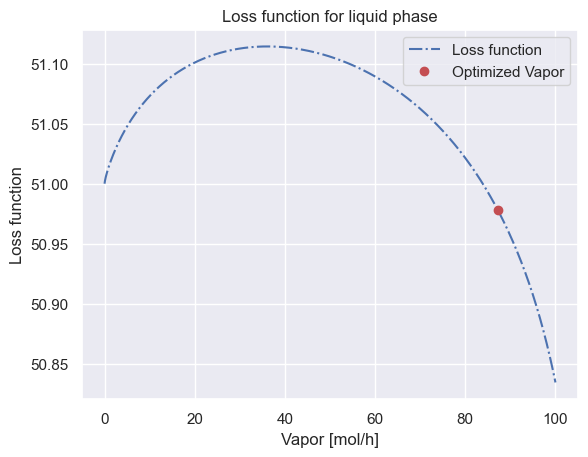

In [59]:
step = 1E-2
Vapor = np.arange(0, Feed, step)
loss = np.array([loss_function_liq_phase(v) for v in Vapor])

plt.plot(Vapor, loss, 'b-.')
plt.plot(Vapor_opt, loss_function_liq_phase(Vapor_opt), 'ro')
plt.legend(['Loss function', 'Optimized Vapor'])
plt.xlabel('Vapor [mol/h]')
plt.ylabel('Loss function')
plt.title('Loss function for liquid phase')
plt.show()

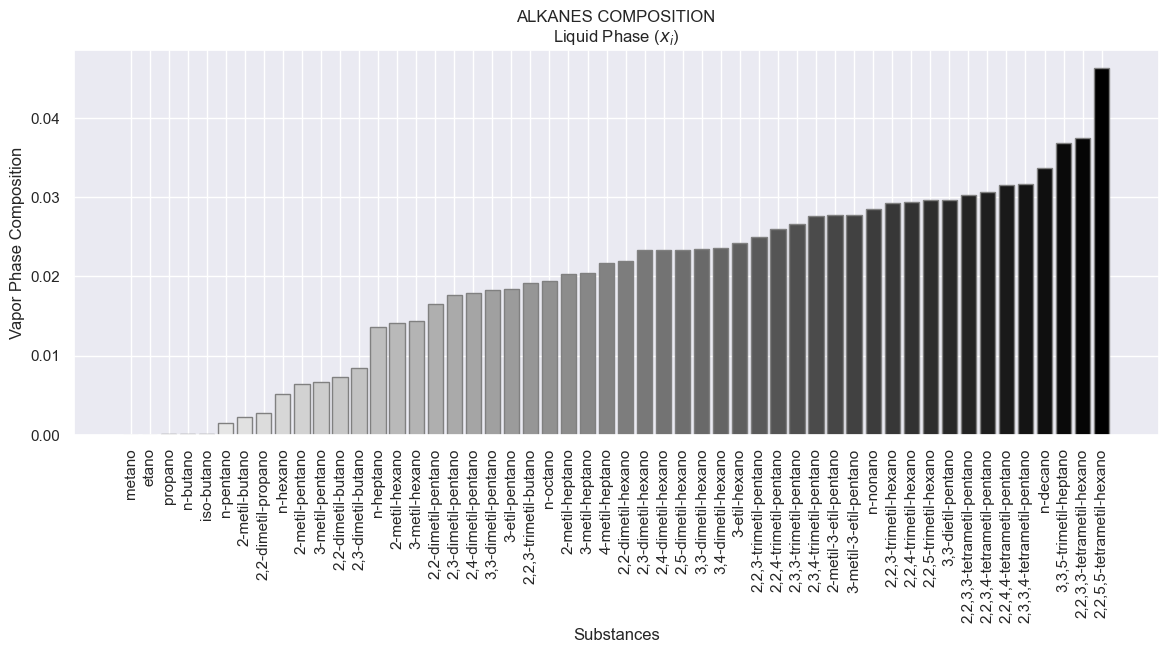

In [60]:
# Assuming xi_optimized and df are already defined
sorted_values = np.sort(xi_optimized)
fig, ax = plt.subplots(figsize=(14, 5))

# gray gradient using a colormap
gray_gradient = cm.gray(np.linspace(1, 0, len(df.df)))
ax.bar(df.df['composto'], sorted_values, color=gray_gradient, edgecolor='gray')
ax.set_xlabel('Substances')
ax.set_ylabel('Vapor Phase Composition')
ax.set_title(f'ALKANES COMPOSITION\nLiquid Phase ($x_i$)')
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [62]:
# solving the bubble point temperature
obj = Objective(df.df, x=xi_optimized, P=P_process)

# Solve for the bubble point temperature
ans, = fsolve(obj, 100)

print(f'Bubble point temperature: {obj.T - 273.15:.2f} C')
print(f'Composition: {np.sort(obj.x)}')

Bubble point temperature: -151.65 C
Composition: [2.75084788e-06 1.15463558e-05 3.56321315e-05 8.06109083e-05
 1.04575242e-04 1.43405481e-03 2.24415223e-03 2.73621402e-03
 5.13361677e-03 6.36797335e-03 6.71705393e-03 7.30862006e-03
 8.45596521e-03 1.36630104e-02 1.41509243e-02 1.43378931e-02
 1.64976772e-02 1.76848855e-02 1.78819688e-02 1.82948330e-02
 1.84018459e-02 1.91822418e-02 1.94055354e-02 2.02919394e-02
 2.04104561e-02 2.16694881e-02 2.19179490e-02 2.33670164e-02
 2.33861343e-02 2.33947459e-02 2.35088597e-02 2.35437566e-02
 2.42317078e-02 2.50043802e-02 2.59967764e-02 2.66304801e-02
 2.76234536e-02 2.77033057e-02 2.77927046e-02 2.85553376e-02
 2.92847479e-02 2.93554530e-02 2.96250443e-02 2.96686654e-02
 3.02290899e-02 3.06156684e-02 3.16053259e-02 3.16933430e-02
 3.37072705e-02 3.68548467e-02 3.75352187e-02 4.63171230e-02]


C:\Users\gabri\AppData\Local\Temp\ipykernel_12920\483262800.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ans, = fsolve(obj, 100)


In [63]:
for index, row in alkanedata.iterrows():
    print(f"Substance: {row['composto']}\tFinal composition: {round(obj.x[index],7)}")

Substance: metano	Final composition: 2.8e-06
Substance: etano	Final composition: 1.15e-05
Substance: propano	Final composition: 3.56e-05
Substance: n-butano	Final composition: 0.0001046
Substance: iso-butano	Final composition: 8.06e-05
Substance: n-pentano	Final composition: 0.0027362
Substance: 2-metil-butano	Final composition: 0.0022442
Substance: 2,2-dimetil-propano	Final composition: 0.0014341
Substance: n-hexano	Final composition: 0.008456
Substance: 2-metil-pentano	Final composition: 0.0067171
Substance: 3-metil-pentano	Final composition: 0.0073086
Substance: 2,2-dimetil-butano	Final composition: 0.0051336
Substance: 2,3-dimetil-butano	Final composition: 0.006368
Substance: n-heptano	Final composition: 0.023367
Substance: 2-metil-hexano	Final composition: 0.0184018
Substance: 3-metil-hexano	Final composition: 0.0194055
Substance: 2,2-dimetil-pentano	Final composition: 0.013663
Substance: 2,3-dimetil-pentano	Final composition: 0.0182948
Substance: 2,4-dimetil-pentano	Final composi

In [64]:
print(f'Sum of y_i (vapor phase): {np.sum(obj.x)}')

Sum of y_i (vapor phase): 1.0216538694697213


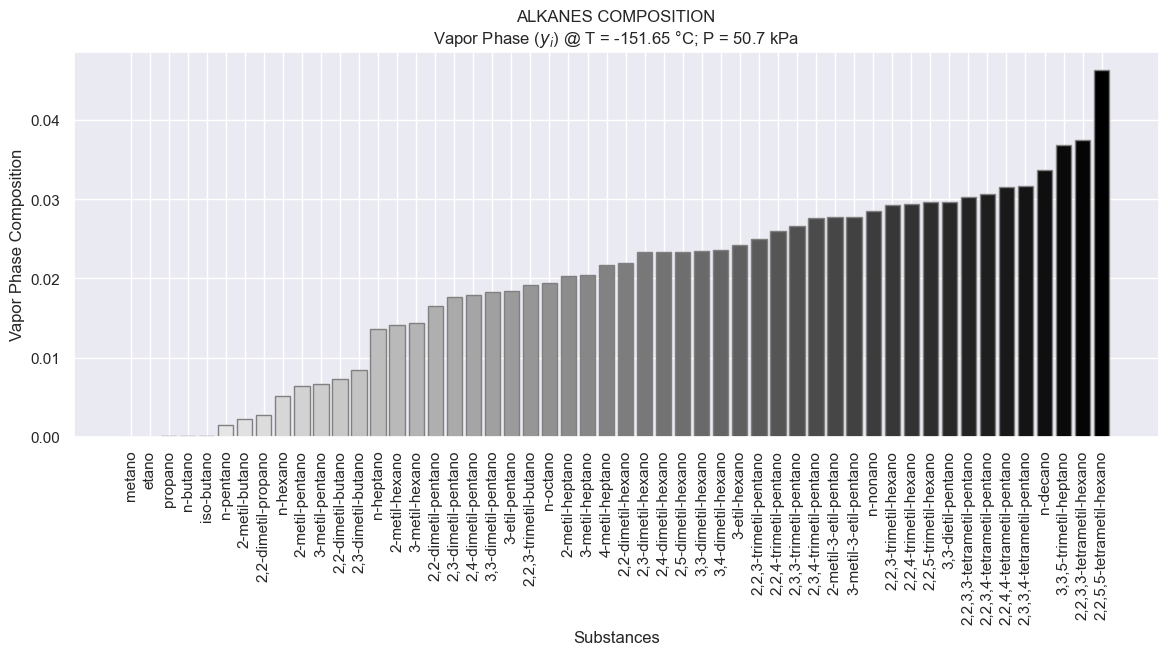

In [67]:
fig, ax = plt.subplots(figsize=(14, 5))

# gray gradient using a colormap
gray_gradient = cm.gray(np.linspace(1, 0, len(df.df)))
ax.bar(df.df['composto'], np.sort(obj.x), color=gray_gradient, edgecolor='gray')
ax.set_xlabel('Substances')
ax.set_ylabel('Vapor Phase Composition')
ax.set_title(f'ALKANES COMPOSITION\nVapor Phase ($y_i$) @ T = {round(ans-273.15, 2)} °C; P = {round(P_process/7.50062 ,1)} kPa')
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [91]:
pre_optimization_stats = [
    ('Feed', round(Feed,2)),
    ('Liquid', round(Liquid,2)),
    ('Vapor', round(Vapor,2)),
    ('P_process', round(P_process,2)),
    ('T_process', round(T_process,2)),
    ('Liquid_opt', round(Liquid_opt,2)),
    ('Vapor_opt', round(Vapor_opt,2)),
]

post_optimization_stats = [
    ('Feed', round(Feed,2)),
    ('Liquid', round(Liquid_opt,2)),
    ('Vapor', round(Vapor_opt,2)),
    ('P_process', round(P_process,2)),
    ('T_process', round(T_process,2)),
    ('Bubble point temperature', round(ans,2))
]

print("Pre-optimization stats:")
for stat in pre_optimization_stats:
    print(f"{stat[0]}: {stat[1]}")

print("\nPost-optimization stats:")
for stat in post_optimization_stats:
    print(f"{stat[0]}: {stat[1]}")


Pre-optimization stats:
Feed: 100
Liquid: 40
Vapor: 60
P_process: 380.0
T_process: 85
Liquid_opt: 12.83
Vapor_opt: 87.17

Post-optimization stats:
Feed: 100
Liquid: 12.83
Vapor: 87.17
P_process: 380.0
T_process: 85
Bubble point temperature: 121.5
